1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks'?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-09-26,194.309998,194.529999,189.539993,191.160004,191.160004,36334900,AMAZON
2024-09-27,190.679993,190.899994,187.339996,187.970001,187.970001,36002300,AMAZON
2024-09-30,187.139999,188.490005,184.649994,186.330002,186.330002,41583900,AMAZON
2024-10-01,184.899994,186.190002,183.449997,185.130005,185.130005,36044900,AMAZON
2024-10-02,184.440002,186.600006,184.039993,184.759995,184.759995,23704100,AMAZON
2024-10-03,183.050003,183.440002,180.880005,181.960007,181.960007,30204300,AMAZON
2024-10-04,185.750000,187.600006,183.600006,186.509995,186.509995,40890300,AMAZON
2024-10-07,182.949997,183.600006,180.250000,180.800003,180.800003,42364200,AMAZON
2024-10-08,181.919998,183.089996,180.919998,182.720001,182.720001,26258600,AMAZON


Querying: Extract stocks based on specific performance indicators or timeframes (e.g., past 5 years).

Aggregation: Aggregate the data by month to analyze trends.

EDA: Plot the stock price trends and identify key patterns or anomalies.
Regression: Build a regression model to predict stock prices based on historical data (e.g., using time as a predictor).

Dataset description:
1. Open: the value of stock opened on the particular day and reflects price only for early trading which are influenced by pre market factors

2. Closing price depicts the end of the price for a stock

3. Volume indicates the level of interest or activity in stock

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,170.918046,172.781205,169.052734,170.978120,169.249733,5.472977e+07
std,82.268081,82.824517,81.556017,82.227516,81.236333,4.282100e+07
min,52.825500,53.566002,50.676800,52.831001,52.701576,6.936000e+06
25%,117.997499,119.480000,116.319998,118.127127,117.419138,2.499700e+07
50%,152.080002,154.128250,150.254005,152.114998,150.925613,4.242100e+07
75%,190.365002,191.699997,188.947502,189.982498,189.349087,7.047952e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,4.265100e+08


Clearly the code does not have any outliers

<ipython-input-3-99418907aecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


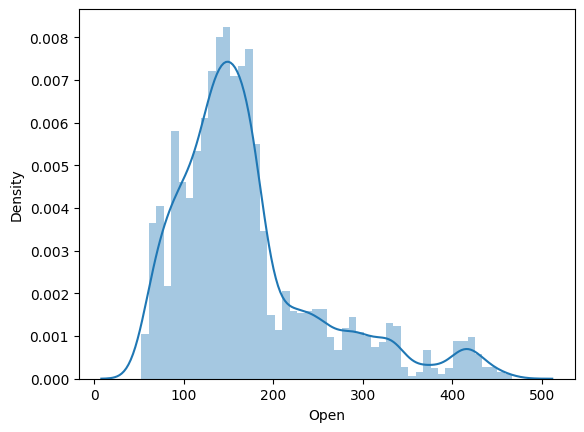

<ipython-input-3-99418907aecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


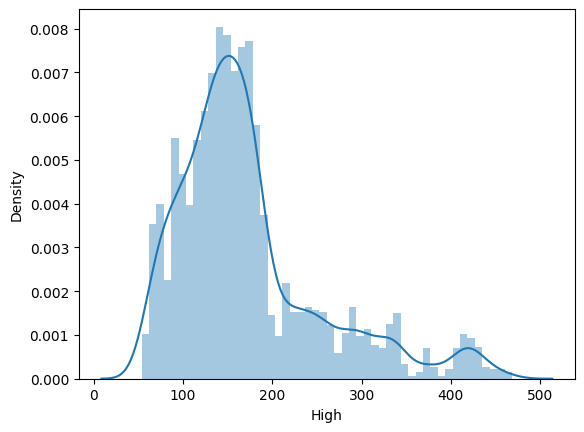

<ipython-input-3-99418907aecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


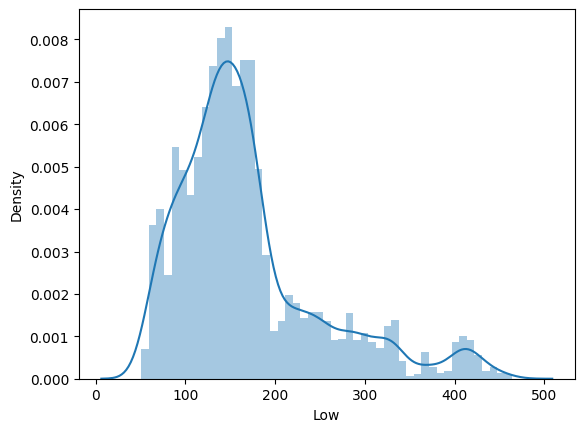

<ipython-input-3-99418907aecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


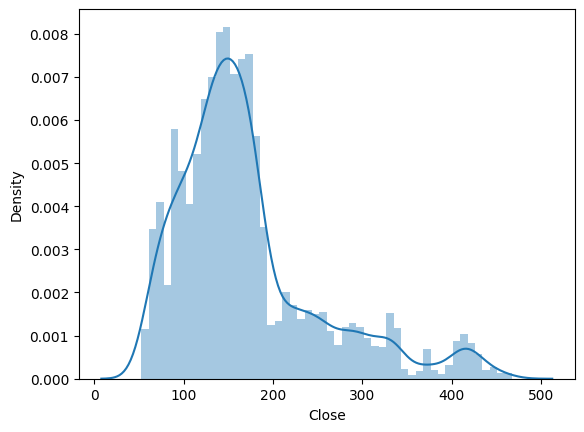

<ipython-input-3-99418907aecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


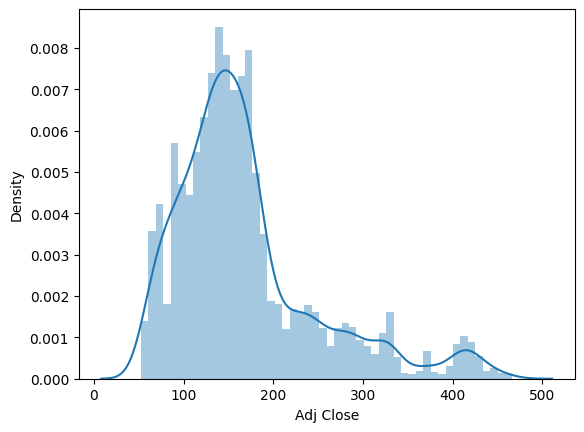

<ipython-input-3-99418907aecc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


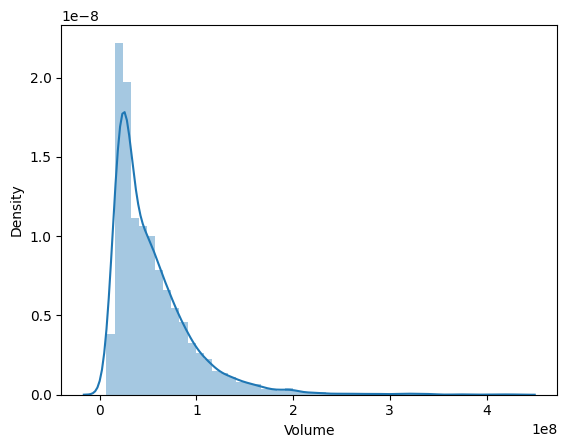

In [ ]:
for col in df.columns[:-1]:
    sns.distplot(df[col])
    plt.show()

Analyze descriptive statistics for each stock:

In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,146.131865,147.764756,144.606243,146.265882,144.571929,9.312798e+07
std,41.370528,41.620113,41.090731,41.362760,41.868657,5.271485e+07
min,56.757500,56.947498,53.152500,56.092499,54.569733,1.730485e+07
25%,124.174999,125.474998,122.414997,124.389999,121.863461,5.861160e+07
50%,148.970001,150.639999,147.619995,149.240005,147.155807,7.914430e+07
75%,174.220001,176.115005,172.659996,174.665001,172.945213,1.096606e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,4.265100e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-10-09 to 2024-10-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Adj Close     1259 non-null   float64
 5   Volume        1259 non-null   int64  
 6   company_name  1259 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
company_name,0


Analyzing for Close column

In [ ]:
df['Close'].describe()

,Close
count,5036.000000
mean,170.978120
std,82.227516
min,52.831001
25%,118.127127
50%,152.114998
75%,189.982498
max,467.559998


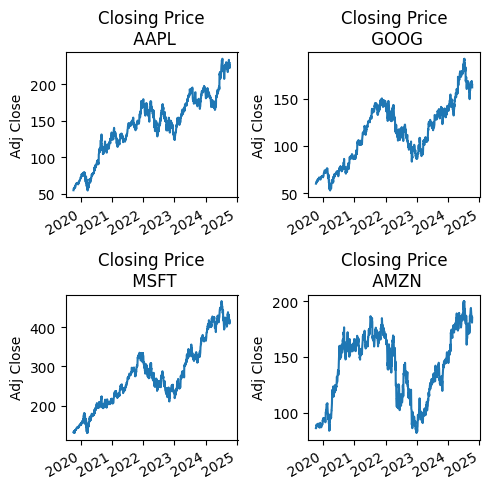

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    # chart formatting
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price\n {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

Volume of stocks:

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

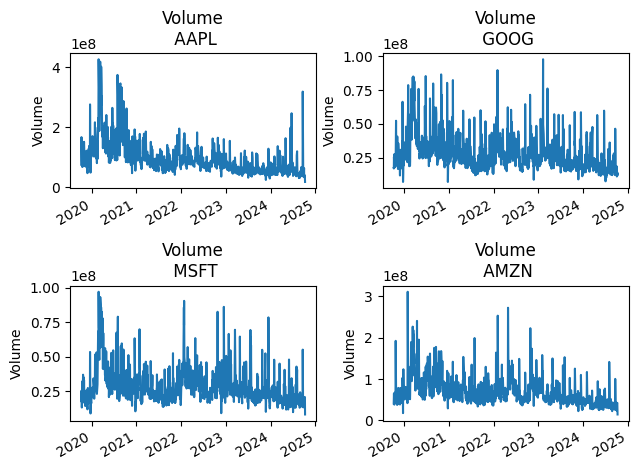

In [ ]:
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    # chart formatting
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume\n {tech_list[i - 1]}")

plt.tight_layout()
plt.show()

What was the moving average of various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()
    print(company)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-09   56.757500   56.947498   56.410000   56.757500   54.921059   
2019-10-10   56.982498   57.610001   56.825001   57.522499   55.661304   
2019-10-11   58.237499   59.410000   58.077499   59.052502   57.141804   
2019-10-14   58.724998   59.532501   58.667500   58.967499   57.059551   
2019-10-15   59.097500   59.412498   58.720001   58.830002   56.926502   
...                ...         ...         ...         ...         ...   
2024-10-03  225.139999  226.809998  223.320007  225.669998  225.669998   
2024-10-04  227.899994  228.000000  224.130005  226.800003  226.800003   
2024-10-07  224.500000  225.690002  221.330002  221.690002  221.690002   
2024-10-08  224.300003  225.979996  223.250000  225.770004  225.770004   
2024-10-09  225.169998  229.039902  224.830002  228.684998  228.684998   

               Volume company_name  M

Text(0.5, 1.0, 'AMZN')

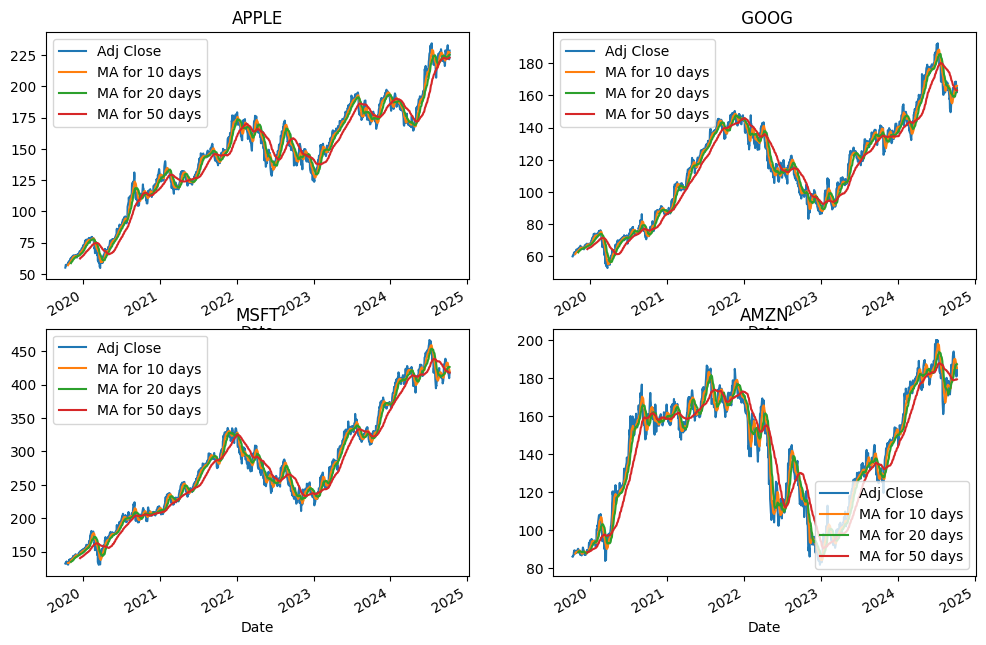

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(12)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(' GOOG')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MSFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMZN')

What was the daily return of the stock on average?

Text(0.5, 1.0, 'AMAZON')

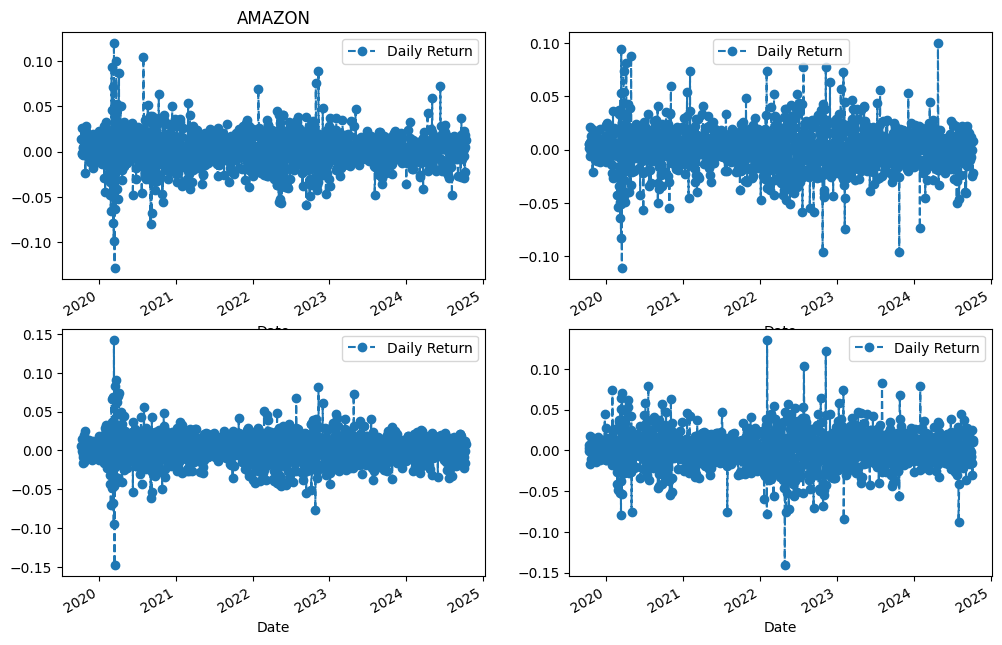

In [ ]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(12)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AMAZON')

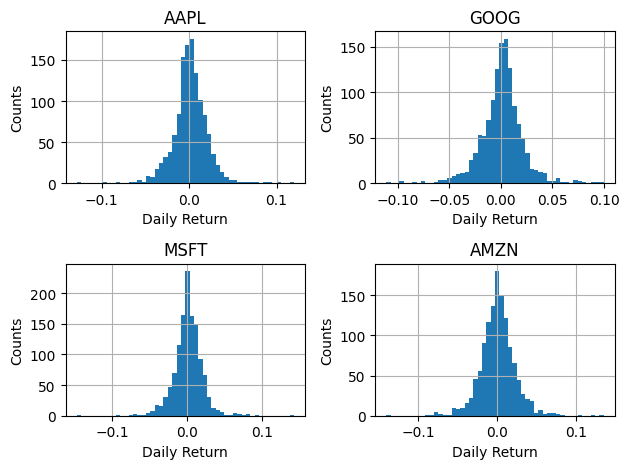

In [ ]:
for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  # chart formatting
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f"{tech_list[i - 1]}")

plt.tight_layout()

Correlation between different stocks

In [ ]:
df2 = df.pivot_table(index='Date', columns='company_name', values='Adj Close')
df2.head()

company_name,AMAZON,APPLE,GOOGLE,MICROSOFT
Date,,,,
2019-10-09,86.099503,54.921059,59.968231,132.039886
2019-10-10,86.013000,55.661304,60.285446,132.861313
2019-10-11,86.596001,57.141804,60.623619,133.415314
2019-10-14,86.821503,57.059551,60.707909,133.291199
2019-10-15,88.369003,56.926502,61.998241,135.220581


In [ ]:
df2.corr()

company_name,AMAZON,APPLE,GOOGLE,MICROSOFT
company_name,,,,
AMAZON,1.000000,0.506824,0.680853,0.607991
APPLE,0.506824,1.000000,0.887713,0.930751
GOOGLE,0.680853,0.887713,1.000000,0.937866
MICROSOFT,0.607991,0.930751,0.937866,1.000000


In [ ]:
df2.corr().style.background_gradient(cmap='coolwarm')

company_name,AMAZON,APPLE,GOOGLE,MICROSOFT
company_name,,,,
AMAZON,1.000000,0.506824,0.680853,0.607991
APPLE,0.506824,1.000000,0.887713,0.930751
GOOGLE,0.680853,0.887713,1.000000,0.937866
MICROSOFT,0.607991,0.930751,0.937866,1.000000


We can see a great correlation between stocks in Google and Microsoft and
Google with Amazon

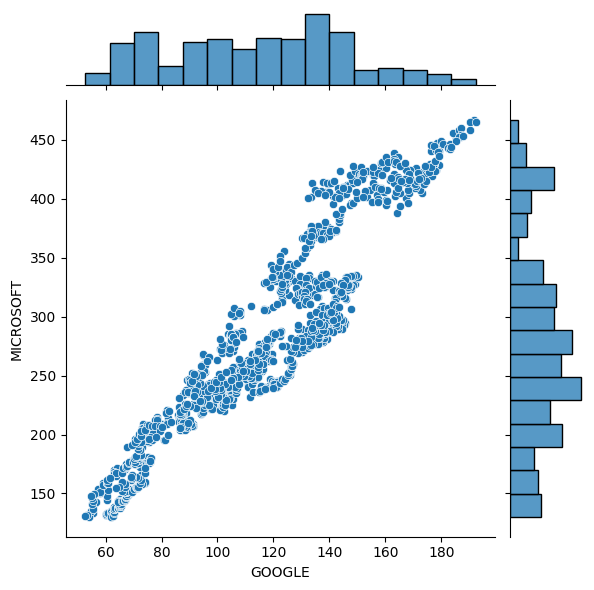

In [ ]:
sns.jointplot(x='GOOGLE',y='MICROSOFT',data=df2,kind='scatter')

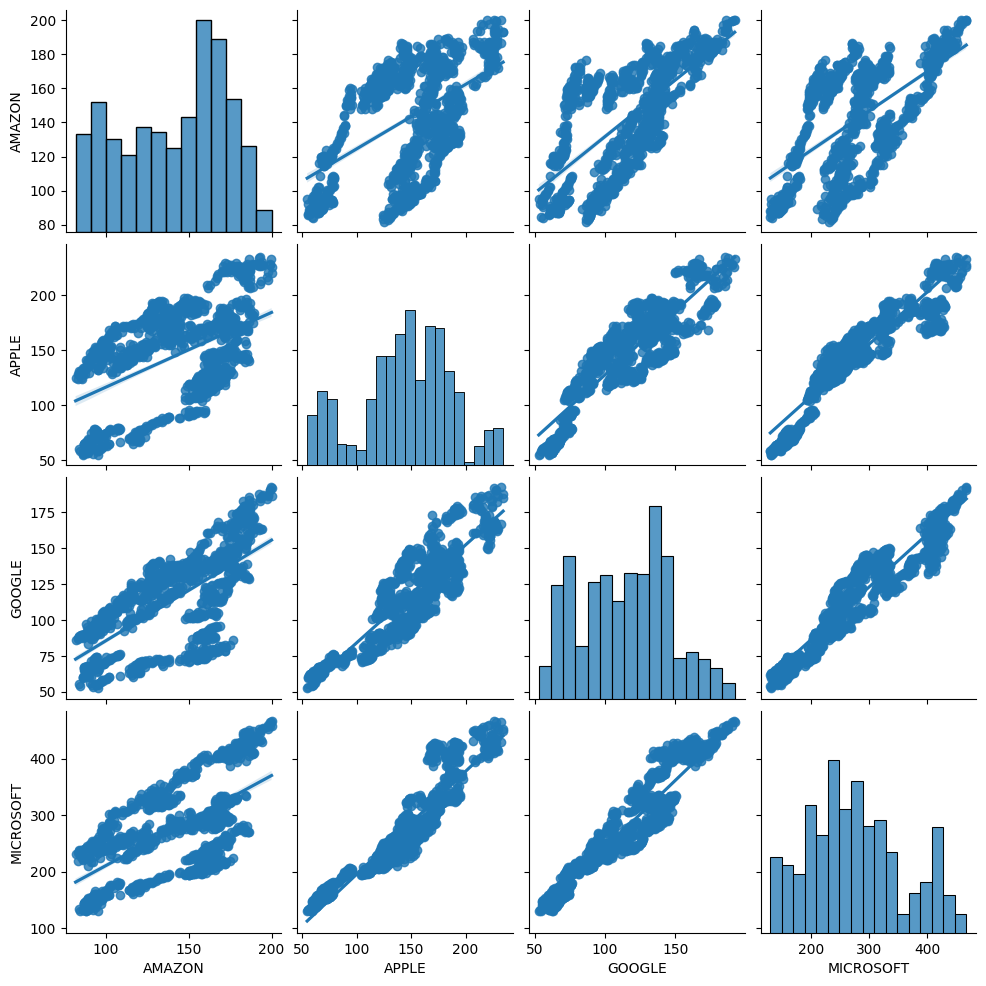

In [ ]:
sns.pairplot(df2, kind='reg')

5. How much value do we put at risk by investing in a particular stock?¶

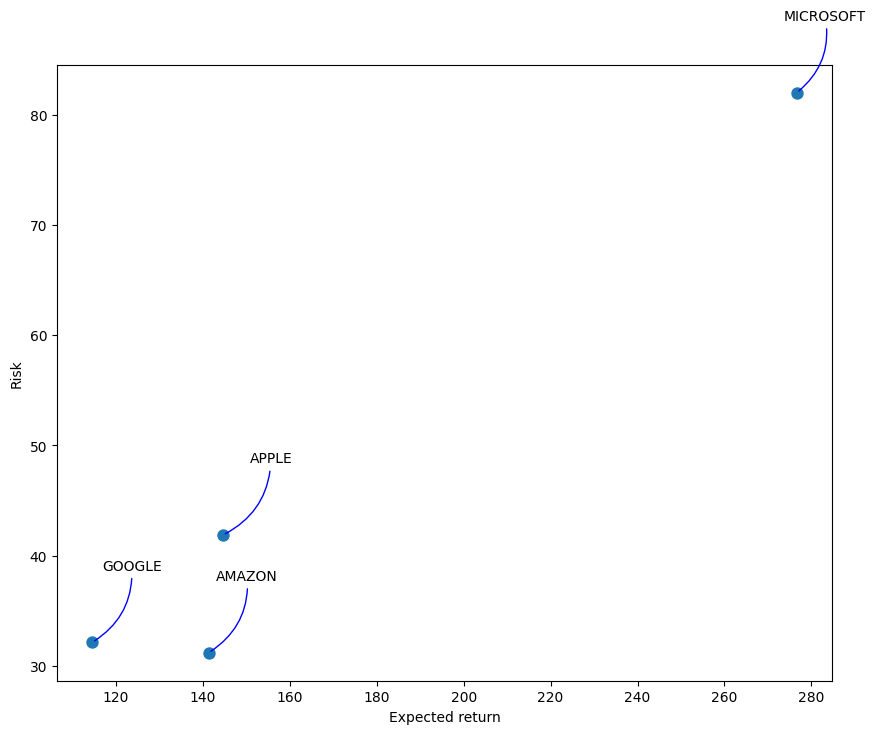

In [ ]:
rets = df2.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting the closing price stocks for MICROSOFT


In [ ]:
df = df[df['company_name'] == 'MICROSOFT']
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-10-09,137.460007,138.699997,136.970001,138.240005,132.039886,19749900,MICROSOFT
2019-10-10,138.490005,139.669998,138.250000,139.100006,132.861313,17654600,MICROSOFT
2019-10-11,140.119995,141.029999,139.500000,139.679993,133.415314,25446000,MICROSOFT
2019-10-14,139.690002,140.289993,139.520004,139.550003,133.291199,13304300,MICROSOFT
2019-10-15,140.059998,141.789993,139.809998,141.570007,135.220581,19695700,MICROSOFT
...,...,...,...,...,...,...,...
2024-10-03,417.630005,419.549988,414.290009,416.540009,416.540009,13686400,MICROSOFT
2024-10-04,418.239990,419.750000,414.970001,416.059998,416.059998,19169700,MICROSOFT
2024-10-07,416.000000,417.109985,409.000000,409.540009,409.540009,20919800,MICROSOFT


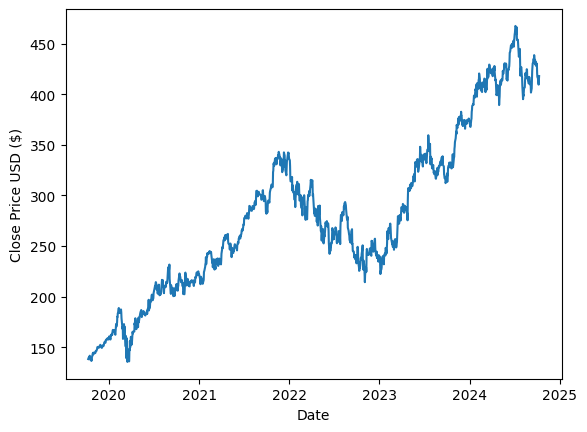

In [ ]:
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
data = df['Close']
data

,Close
Date,
2019-10-09,138.240005
2019-10-10,139.100006
2019-10-11,139.679993
2019-10-14,139.550003
2019-10-15,141.570007
...,...
2024-10-03,416.540009
2024-10-04,416.059998
2024-10-07,409.540009


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.values.reshape(-1,1))

data_scaled

array([[0.00849042],
       [0.01107969],
       [0.0128259 ],
       ...,
       [0.82531466],
       [0.84088033],
       [0.85075568]])

In [ ]:
last_date = data.index[-1]

# Generate future dates for the next 365 days
future_dates = pd.date_range(start=last_date, periods=60, freq='D')

# Display the generated future dates
print(future_dates)

DatetimeIndex(['2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12',
               '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16',
               '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-20',
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-26', '2024-10-27', '2024-10-28',
               '2024-10-29', '2024-10-30', '2024-10-31', '2024-11-01',
               '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
               '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09',
               '2024-11-10', '2024-11-11', '2024-11-12', '2024-11-13',
               '2024-11-14', '2024-11-15', '2024-11-16', '2024-11-17',
               '2024-11-18', '2024-11-19', '2024-11-20', '2024-11-21',
               '2024-11-22', '2024-11-23', '2024-11-24', '2024-11-25',
               '2024-11-26', '2024-11-27', '2024-11-28', '2024-11-29',
               '2024-11-30', '2024-12-01', '2024-12-02', '2024-12-03',
      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Since we are predicting the next's close when perform a lag by shiftting it by 1
df_scaled = pd.DataFrame(data_scaled, columns=['Close_Scaled'])
df_scaled['Close-lag'] = df_scaled['Close_Scaled'].shift(1)
df_scaled.dropna(inplace=True)

# Step 1: Define X and y (from the lagged features and scaled 'Close' values)
X = df_scaled['Close-lag'].values.reshape(-1, 1)
y = df_scaled['Close_Scaled'].values.reshape(-1, 1)

# Step 2: Train the model (fit the model using historical data)
regressor = LinearRegression()
regressor.fit(X, y)  # Fit the model on lagged data


LinearRegression()

In [ ]:
last_value = df_scaled['Close_Scaled'].values[-1]
future_predictions = []

for _ in future_dates:
  next_pred = regressor.predict(np.array(last_value).reshape(1, -1))
  future_predictions.append(next_pred[0])
  last_value = next_pred[0]

future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print(future_predictions_original)

[[417.95310738]
 [417.91629458]
 [417.87955169]
 [417.84287857]
 [417.8062751 ]
 [417.76974115]
 [417.73327658]
 [417.69688126]
 [417.66055505]
 [417.62429784]
 [417.58810948]
 [417.55198985]
 [417.51593881]
 [417.47995624]
 [417.44404201]
 [417.40819598]
 [417.37241802]
 [417.33670801]
 [417.30106582]
 [417.26549132]
 [417.22998438]
 [417.19454487]
 [417.15917266]
 [417.12386763]
 [417.08862964]
 [417.05345858]
 [417.01835432]
 [416.98331672]
 [416.94834566]
 [416.91344101]
 [416.87860265]
 [416.84383046]
 [416.8091243 ]
 [416.77448405]
 [416.73990959]
 [416.70540078]
 [416.67095752]
 [416.63657967]
 [416.6022671 ]
 [416.5680197 ]
 [416.53383734]
 [416.49971989]
 [416.46566724]
 [416.43167925]
 [416.39775582]
 [416.3638968 ]
 [416.33010209]
 [416.29637157]
 [416.26270509]
 [416.22910256]
 [416.19556384]
 [416.16208881]
 [416.12867736]
 [416.09532936]
 [416.06204469]
 [416.02882324]
 [415.99566487]
 [415.96256948]
 [415.92953693]
 [415.89656712]]


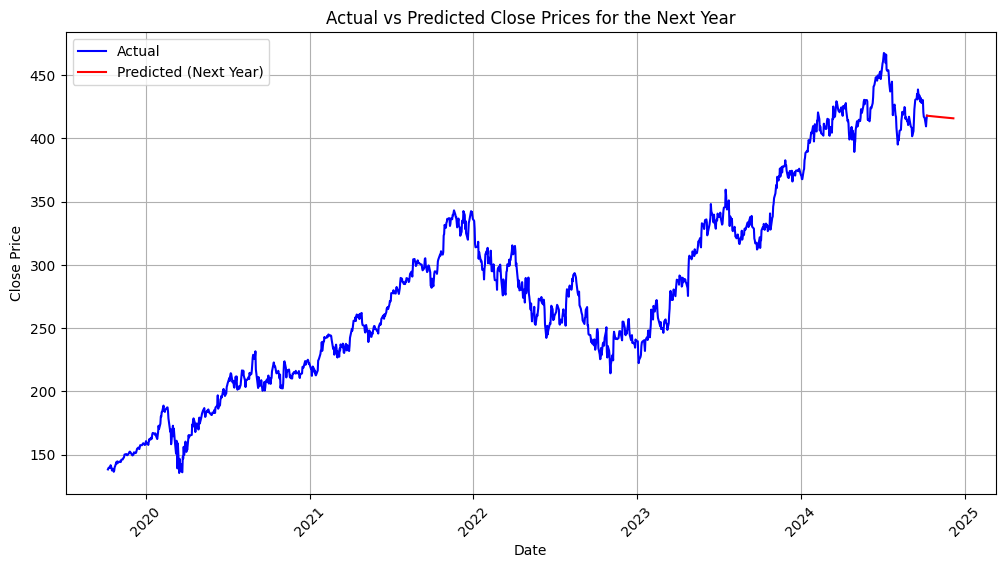

In [ ]:
# Plot actual close prices up to the present
plt.figure(figsize=(12, 6))

# Plot the actual values
plt.plot(data.index, data, label='Actual', color='blue')

# Plot the future predicted values
plt.plot(future_dates, future_predictions_original, label='Predicted (Next Year)', color='red')

# Add labels and title
plt.title('Actual vs Predicted Close Prices for the Next Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Regression: Run a regression to predict "Close" prices based on "Open" and "Volume" and interpret the results.

In [ ]:
data = df[['Open', 'Volume', 'Close']]
data

,Open,Volume,Close
Date,,,
2019-10-09,137.460007,19749900,138.240005
2019-10-10,138.490005,17654600,139.100006
2019-10-11,140.119995,25446000,139.679993
2019-10-14,139.690002,13304300,139.550003
2019-10-15,140.059998,19695700,141.570007
...,...,...,...
2024-10-03,417.630005,13686400,416.540009
2024-10-04,418.239990,19169700,416.059998
2024-10-07,416.000000,20919800,409.540009


In [ ]:
data.isnull().sum()

,0
Open,0
Volume,0
Close,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Open', 'Volume']].values
y = data['Close'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 15.52522571978826
Root Mean Squared Error (RMSE): 3.940206304216603
R-squared (R2) Score: 0.9975142621101544


In [ ]:
print("F Intercept: {regressor.intercept_}")
print(f"F Coefficients: {regressor.coef_}")

# Assign coefficients to variables
coeff_open = regressor.coef_[0]
coeff_volume = regressor.coef_[1]

F Intercept: {regressor.intercept_}
F Coefficients: [ 9.96350535e-01 -2.67044005e-08]


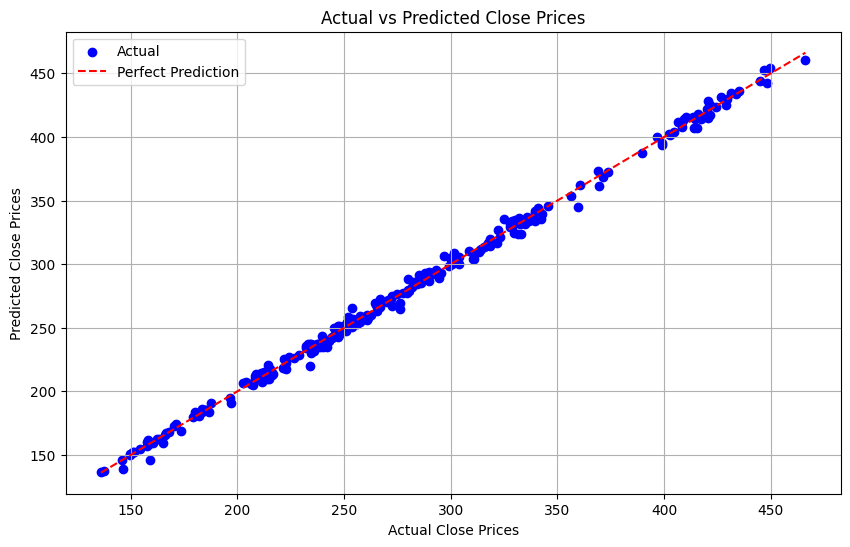

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, label='Actual', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()